In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import lmdiag
from plot_lm import plot_lm

In [4]:
auto = pd.read_csv('data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

In [6]:
auto.dropna(inplace=True)

In [7]:
auto.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [8]:
lm = smf.ols(formula='mpg ~ horsepower', data=auto).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           7.03e-81
Time:                        16:38:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      

In [9]:
# There is a relationship between horsepower & mpg due to p nearly 0
# Strong or not? Strong due to p-value nearly 0
# Relationship negative due to coef negative -0.1578
# Predicted interval with 95% at 98 horsepower
prediction = lm.get_prediction(exog=dict(horsepower=98))
prediction.summary_frame(alpha=0.05)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

,mean,mean_ci_lower,mean_ci_upper
0,24.467077,23.973079,24.961075


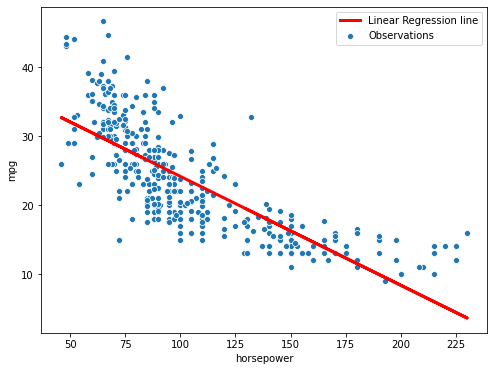

In [10]:
# Plot scartter & regression line
plt.figure(figsize=(8,6))
sb.scatterplot(data=auto, x='horsepower', y='mpg', label='Observations')
plt.plot(auto['horsepower'], lm.fittedvalues, color='red', linewidth=3, label='Linear Regression line')
plt.legend()
plt.show()

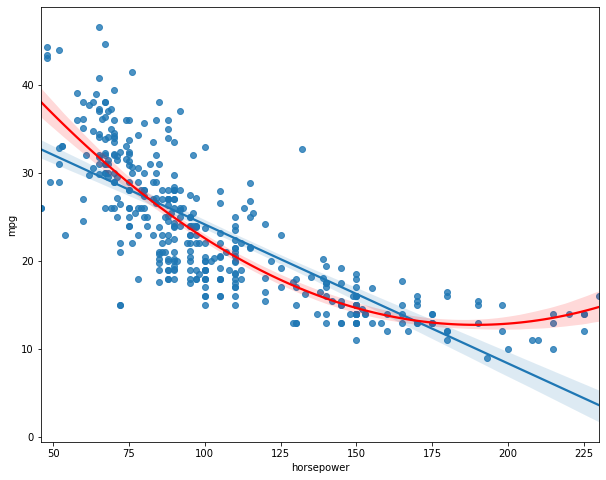

In [19]:
plt.figure(figsize=(10,8))
sb.regplot(data=auto, x='horsepower', y='mpg', ci=95)
sb.regplot(data=auto, x='horsepower', y='mpg', ci=95, order=2, scatter=False, color='red')
plt.show()

In [12]:
# Plot fitted values vs residuals, studentized residuals, leverage to see outliers or leverage on data
from statsmodels.stats.outliers_influence import summary_table
simpleTable, data, column_names = summary_table(lm, alpha=0.05)
residuals = data[:,8]
student_residuals = data[:,10]
fitted_values = lm.fittedvalues

from statsmodels.stats.outliers_influence import OLSInfluence
leverage = OLSInfluence(lm).influence

# Color Outliers & Leverage
# Student Residuals > 3 is Outliers
color_outliers = np.where(student_residuals>3, 'red', 'blue')
# Leverage Statistics > (p+1)/n = (1+1)/392 = 0.51 is High Leverage
color_leverage = np.where(leverage>0.0051, 'red', 'blue')
# Color both Outliers | High leverage
color_outlier_leverage = np.where((student_residuals>3) | (leverage>0.0051), 'red', 'blue')

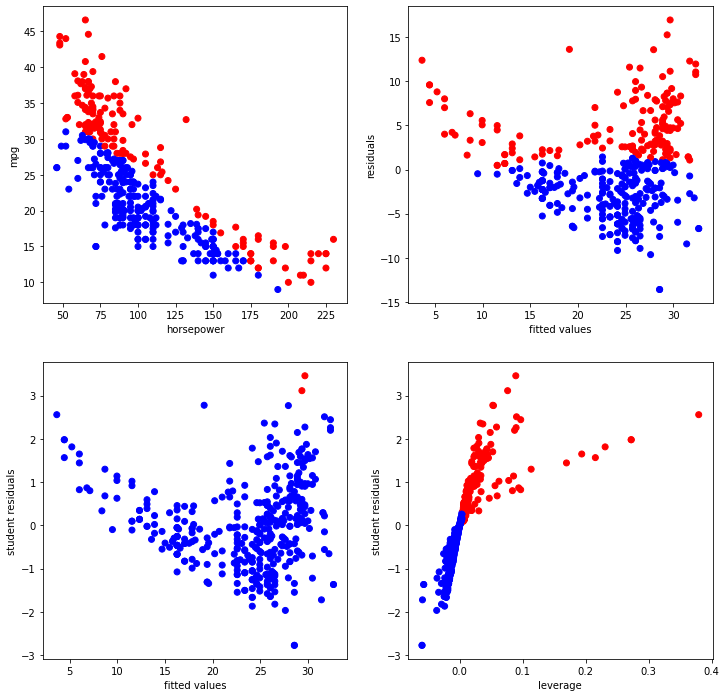

In [13]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0,0].scatter(x=auto['horsepower'], y=auto['mpg'], color=color_outlier_leverage)
ax[0,0].set_xlabel('horsepower')
ax[0,0].set_ylabel('mpg')

ax[0,1].scatter(x=fitted_values, y=residuals, color=color_outlier_leverage)
ax[0,1].set_xlabel('fitted values')
ax[0,1].set_ylabel('residuals')

ax[1,0].scatter(x=fitted_values, y=student_residuals, color=color_outliers)
ax[1,0].set_xlabel('fitted values')
ax[1,0].set_ylabel('student residuals')

ax[1,1].scatter(x=leverage, y=student_residuals, color=color_leverage)
ax[1,1].set_xlabel('leverage')
ax[1,1].set_ylabel('student residuals')

plt.show()

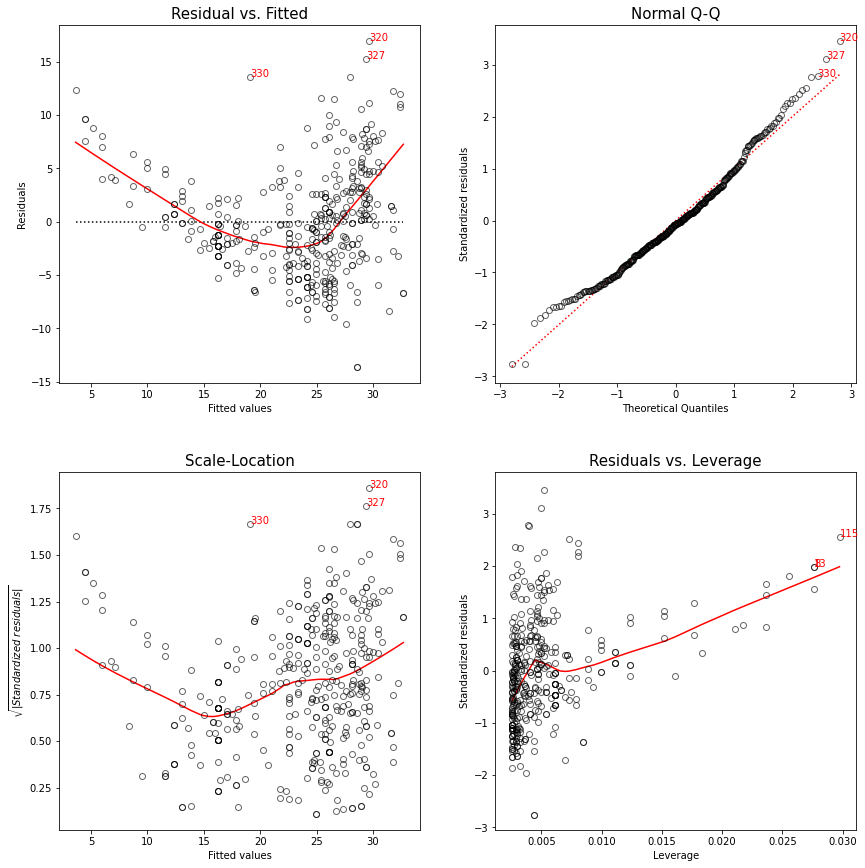

In [14]:
plt.figure(figsize=(12,12))
lmdiag.plot(lm)
plt.show()

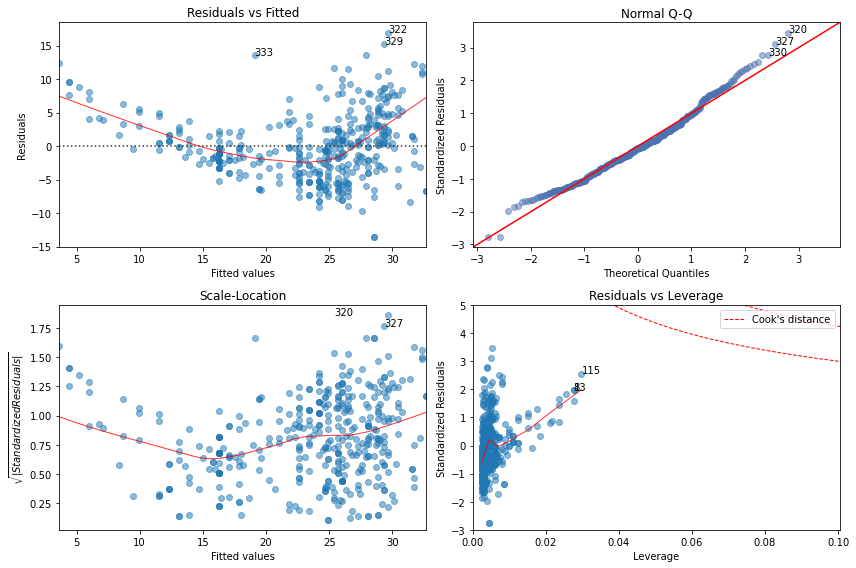

In [15]:
plot_lm(lm, auto, 'mpg')

In [16]:
lm.conf_int(alpha=0.05)

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [17]:
lm.predict(exog=dict(horsepower=[98,100,200]))

0    24.467077
1    24.151388
2     8.366914
dtype: float64

In [18]:
prediction = lm.get_prediction(exog=dict(horsepower=[98,100,200]))
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758
1,24.151388,0.249447,23.660958,24.641817,14.493888,33.808887
2,8.366914,0.663727,7.061985,9.671844,-1.365999,18.099828
